# Assignment #5: Probability and Bootstrapping
Hanna Svenson (jda6qt)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('./data/mammogram.csv')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True) , '\n')

print('Survival rate of control: ', 44405/44910)
print('Survival rate or mammogram: ', 44425/44925)
print('Difference (mammogram rate - control rate ): ', 44425/44925 - 44405/44910)


breast_cancer_death     no   yes    All
treatment                              
control              44405   505  44910
mammogram            44425   500  44925
All                  88830  1005  89835 

Survival rate of control:  0.9887552883544868
Survival rate or mammogram:  0.9888703394546466
Difference (mammogram rate - control rate ):  0.00011505110015985753


2. Bootstrap the densities and distributions of survival rates for the two groups. 


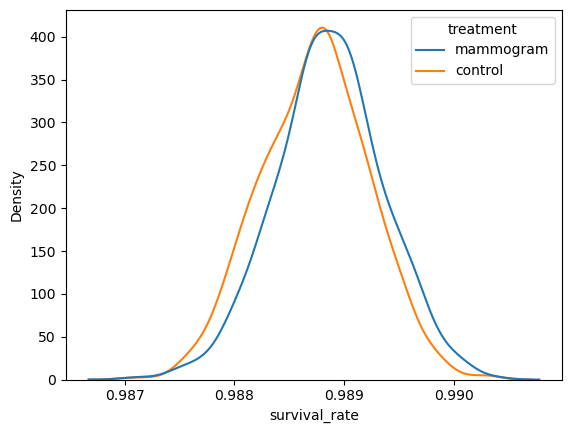

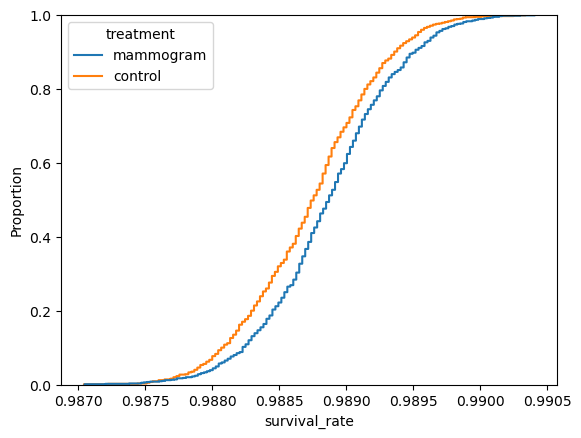

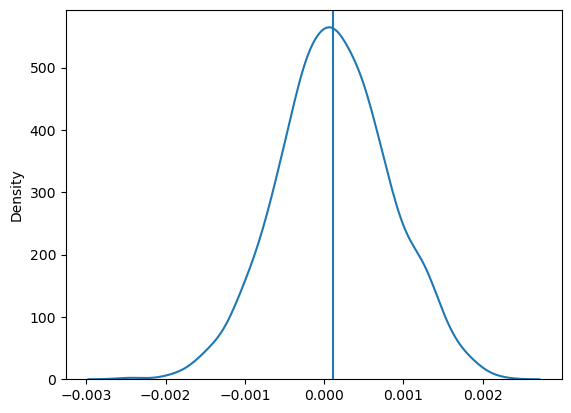

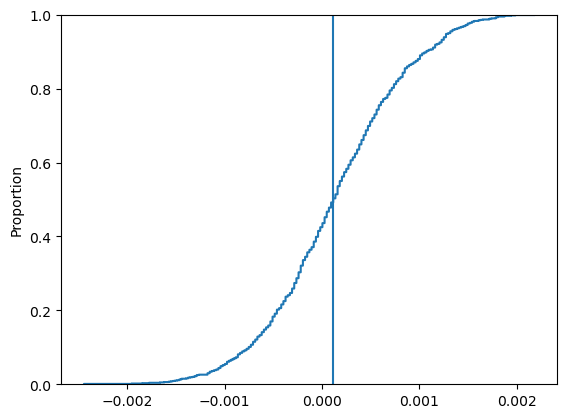

In [2]:
diff_0 = 44425/44925 - 44405/44910
df['survival'] = df['breast_cancer_death'].map({'yes': 0, 'no': 1})

# Treatment data:
df_t = df.loc[ df['treatment'] =='mammogram', 'survival' ]
N_t = df_t.shape[0]
# Control data:
df_c = df.loc[ df['treatment'] =='control', 'survival' ]
N_c = df_c.shape[0]

# Simulation:
S = 1000
rate_T = np.zeros(S) # treatment survival rate
rate_C = np.zeros(S) # control survival rate
diff = np.zeros(S)  # Difference in survival rates

# Bootstrapping:
for s in range(S):
    sample_T = df_t.sample(N_t,axis=0,replace=True) # Resample treatment
    rate_T[s] = sample_T.mean() # Mean survival rate, treatment
    sample_C = df_c.sample(N_c,axis=0,replace=True) # Resample control
    rate_C[s] = sample_C.mean() # Mean survival rate, control
    diff[s] = rate_T[s]-rate_C[s] # Difference in rates

# Combine results into one dataframe for plotting:
rdf_T = pd.DataFrame({'treatment':'mammogram','survival_rate':rate_T})
rdf_C = pd.DataFrame({'treatment':'control','survival_rate':rate_C})
rdf = pd.concat([rdf_T,rdf_C],axis=0)

# Density plot of survival rates:
sns.kdeplot(data=rdf,x='survival_rate',hue='treatment')
plt.show()

# ECDF of survival rates:
sns.ecdfplot(data=rdf,x='survival_rate',hue='treatment')
plt.show()

# Density plot of differences in rates:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0)
plt.show()

# ECDF of differences in rates:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0)
plt.show()

3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?


In [3]:
CI = np.quantile(diff,[.005,.995]) # Compute 99% CI
print( '99% CI: ' + str(CI) )

99% CI: [-0.0016216   0.00180746]


4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

Since the confidence interval of the difference in survival rates overlaps with 0, the data does not support that there is a significant difference in survival rates between patients who get mammograms and those who do not. Some relevant data I would want to look at are the patient demographics (eg. age, income, family status), underlying health conditions, family history of cancer, and any other relevant factors that could affect someone's ability to get cancer treatment or likelihood of getting breast cancer. 

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.


In [4]:
df = pd.read_csv('./data/diabetes_hw.csv')
print( pd.crosstab( df['treatment'], df['outcome'], margins=True) , '\n')
print( pd.crosstab( df['treatment'], df['outcome'], margins=True, normalize=True) , '\n')

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?


In [5]:
print('Success rate of lifestyle: ', 125/234)
print('Success rate of met: ', 112/232)
print('Success rate of rosi: ', 143/233)

Success rate of lifestyle:  0.5341880341880342
Success rate of met:  0.4827586206896552
Success rate of rosi:  0.6137339055793991


3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?


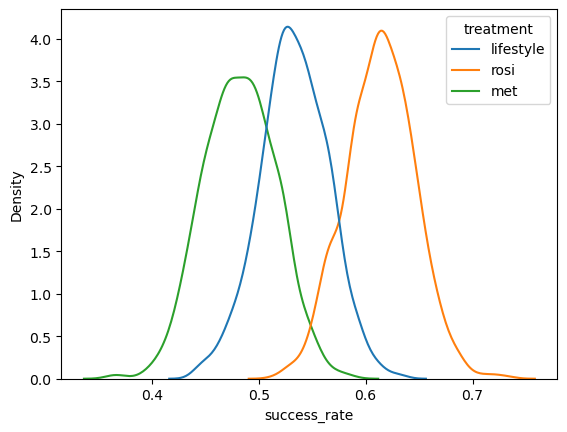

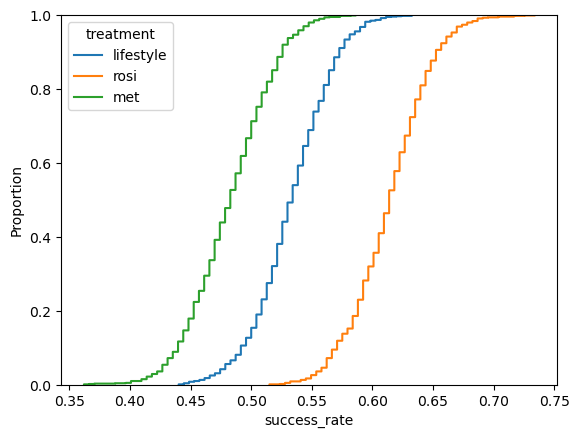

Rosi appears to be most effective, then lifestyle, then met.


In [6]:
df['success'] = df['outcome'].map({'success': 1, 'failure': 0})

# lifestyle data:
df_l = df.loc[ df['treatment'] =='lifestyle', 'success' ]
N_l = df_l.shape[0]
# rosi data:
df_r = df.loc[ df['treatment'] =='rosi', 'success' ]
N_r = df_r.shape[0]
# met data:
df_m = df.loc[ df['treatment'] =='met', 'success' ]
N_m = df_m.shape[0]


# Simulation:
S = 1000
rate_L = np.zeros(S) # lifestyle success rate
rate_R = np.zeros(S) # rosi success rate
rate_M = np.zeros(S) # met success rate

# Bootstrapping:
for s in range(S):
    sample_L = df_l.sample(N_l,axis=0,replace=True) # Resample lifestyle
    rate_L[s] = sample_L.mean() # Mean success rate, lifestyle
    sample_R = df_r.sample(N_r,axis=0,replace=True) # Resample rosi
    rate_R[s] = sample_R.mean() # Mean success rate, rosi
    sample_M = df_m.sample(N_m,axis=0,replace=True) # Resample met
    rate_M[s] = sample_M.mean() # Mean success rate, met

# Combine results into one dataframe for plotting:
rdf_L = pd.DataFrame({'treatment':'lifestyle','success_rate':rate_L})
rdf_R = pd.DataFrame({'treatment':'rosi','success_rate':rate_R})
rdf_M = pd.DataFrame({'treatment':'met','success_rate':rate_M})
rdf = pd.concat([rdf_L,rdf_R, rdf_M],axis=0)

# Density plot of survival rates:
sns.kdeplot(data=rdf,x='success_rate',hue='treatment')
plt.show()

# ECDF of survival rates:
sns.ecdfplot(data=rdf,x='success_rate',hue='treatment')
plt.show()


print('Rosi appears to be most effective, then lifestyle, then met.')

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?



Rosi vs Lifestyle:


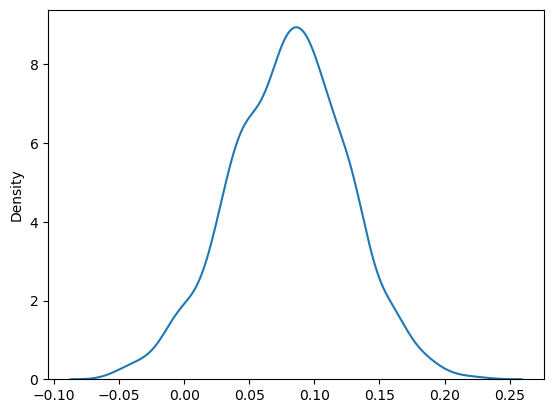

90% CI: [0.00234676 0.15648821]

Statistically significant as there is no overlap with 0. 


 Rosi vs Met:


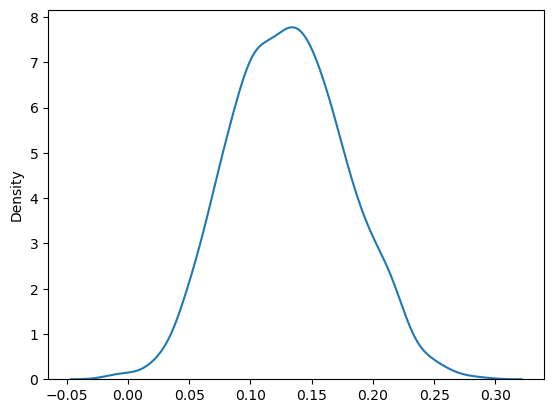

90% CI: [0.05751443 0.21265077]

Statistically significant as there is no overlap with 0. 


 Lifestyle vs Met:


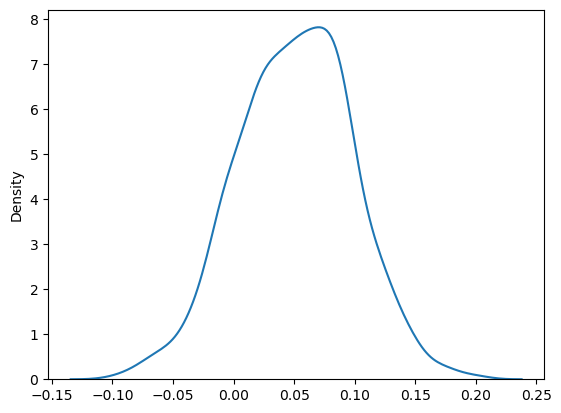

90% CI: [-0.02576628  0.12835802]

Not statistically significant as there is overlap with 0. 



In [7]:
# rosi v lifestyle
print("Rosi vs Lifestyle:")
diff_RL = rate_R-rate_L# Difference in rates
sns.kdeplot(diff_RL)
plt.show()

CI_RL = np.quantile(diff_RL,[.05,.95]) # Compute 90% CI
print( '90% CI: ' + str(CI_RL) + '\n' )
print( 'Statistically significant as there is no overlap with 0. \n' )


# rosi v met
print("\n Rosi vs Met:")
diff_RM = rate_R-rate_M# Difference in rates
sns.kdeplot(diff_RM)
plt.show()

CI_RM = np.quantile(diff_RM,[.05,.95]) # Compute 90% CI
print( '90% CI: ' + str(CI_RM) + '\n' )
print( 'Statistically significant as there is no overlap with 0. \n' )



# lifestyle v met
print("\n Lifestyle vs Met:")
diff_LM = rate_L-rate_M# Difference in rates
sns.kdeplot(diff_LM)
plt.show()

CI_LM = np.quantile(diff_LM,[.05,.95]) # Compute 90% CI
print( '90% CI: ' + str(CI_LM)+ '\n'  )
print( 'Not statistically significant as there is overlap with 0. \n' )


5. Which treatment appears to be the most effective overall?

Based on the 90% confidence intervals, we can see that Rosi outperforms both Lifestyle and Met, as both intervals are positive don't overlap with 0. We cannot confidently say that lifestyle is more effective than met as the 90% confidence interval for the difference in success rates does overlap with 0. 